In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# 1. 生成模拟数据
X, y = make_classification(
    n_samples=1000,   # 样本数量
    n_features=2,     # 特征数量（为了可视化设置为2）
    n_informative=2,  # 有效特征数量
    n_redundant=0,    # 冗余特征数量
    n_classes=2,      # 分类数量
    random_state=42
)

In [3]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# 2. 初始化支持向量机模型 (SVM)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, random_state=42)

In [5]:
# 3. 训练模型
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [6]:
# 4. 预测
y_pred = svm_model.predict(X_test)

In [7]:
# 5. 评估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       101
           1       0.93      0.86      0.89        99

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



In [8]:
# 6. 可视化决策边界
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title('SVM Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

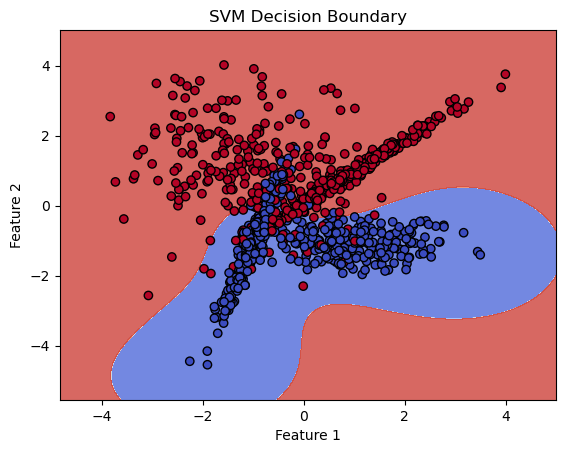

In [9]:
plot_decision_boundary(X, y, svm_model)